# ANN 

## Duo Zhou

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [ ]:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load the data
train= pd.read_csv("/content/drive/My Drive/train.csv",index_col = 0)
validation=pd.read_csv("/content/drive/My Drive/validation.csv",index_col = 0)

In [ ]:
# Check the shape of train and validation set
print("Train shape:", train.shape)
print("Validation shape:", validation.shape)

Train shape: (243760, 57)
Validation shape: (60941, 57)


## Impute Missing Values

### Input columns: OWN_CAR_AGE, OCCUPATION_TYPE
Columns: ONW_CAR_AGE

In [ ]:
# Calculate the mean value of car age when 'FLAG_OWN_CAR' = Y for train and validation
mean_train = train['OWN_CAR_AGE'].mean()
mean_validation = validation['OWN_CAR_AGE'].mean()
print("Car age for train:", mean_train)
print("Car age for validation:", mean_validation)

Car age for train: 12.099066321305946
Car age for validation: 11.959967082970278


In [ ]:
# Fill values of OWN_CAR_AGE based on the values in FLAG_OWN_CAR for train and test
train['OWN_CAR_AGE'] = train['OWN_CAR_AGE'].fillna(train['FLAG_OWN_CAR'])
train['OWN_CAR_AGE'].replace({'N':-1, 'Y':12}, inplace = True)

validation['OWN_CAR_AGE'] = validation['OWN_CAR_AGE'].fillna(validation['FLAG_OWN_CAR'])
validation['OWN_CAR_AGE'].replace({'N':-1, 'Y':12}, inplace = True)

In [ ]:
# Check the missing value rate of column OWN_CAR_AGE
print("Missing values rate for train:", train['OWN_CAR_AGE'].isna().sum()/len(train))
print("Missing values rate for validation:", validation['OWN_CAR_AGE'].isna().sum()/len(validation))

Missing values rate for train: 0.0
Missing values rate for validation: 0.0


##### Column OCCUPATION_TYPE

In [ ]:
# If NAME_INCOME_TYPE == Pensioner, fill na in OCCUPATION_TYPE with Retired for train and validation
train.loc[train['NAME_INCOME_TYPE'] == 'Pensioner', 'OCCUPATION_TYPE'] = 'Retired'
validation.loc[validation['NAME_INCOME_TYPE'] == 'Pensioner', 'OCCUPATION_TYPE'] = 'Retired'

In [ ]:
# Check the missing values rate in OCCUPATION_TYPE
print("Missing values rate for train:", train['OCCUPATION_TYPE'].isna().sum()/len(train))
print("Missing values rate for validation:", validation['OCCUPATION_TYPE'].isna().sum()/len(validation))

Missing values rate for train: 0.13313915326550704
Missing values rate for validation: 0.13391641095485798


In [ ]:
# Most common occupation type in train and validation
print("Most common occupation type for train:", train['OCCUPATION_TYPE'].value_counts().index[0])
print("Most common occupation type for validation:", validation['OCCUPATION_TYPE'].value_counts().index[0])

Most common occupation type for train: Retired
Most common occupation type for validation: Retired


In [ ]:
# Fill the na in train and validation
train['OCCUPATION_TYPE'].fillna('Retired', inplace = True)
validation['OCCUPATION_TYPE'].fillna('Retired', inplace = True)

# Checking missing values
print("Missing values for train:", train['OCCUPATION_TYPE'].isna().sum())
print("Missing values for validation:", validation['OCCUPATION_TYPE'].isna().sum())

Missing values for train: 0
Missing values for validation: 0


#### Inpute other columns

In [ ]:
missing_train = pd.DataFrame(train.isnull().sum(), columns =['missing value rate'])
print(missing_train.sort_values(ascending = False, by = 'missing value rate')[0:12])

missing_validation = pd.DataFrame(validation.isnull().sum(), columns =['missing value rate'])
print(missing_validation.sort_values(ascending = False, by = 'missing value rate')[0:10])

                          missing value rate
NAME_TYPE_SUITE                           57
EXT_SOURCE_2                              42
OBS_30_CNT_SOCIAL_CIRCLE                  33
DEF_30_CNT_SOCIAL_CIRCLE                  33
TARGET                                     0
FLAG_DOCUMENT_8                            0
LIVE_CITY_NOT_WORK_CITY                    0
ORGANIZATION_TYPE                          0
DAYS_LAST_PHONE_CHANGE                     0
FLAG_DOCUMENT_2                            0
FLAG_DOCUMENT_3                            0
FLAG_DOCUMENT_4                            0
                          missing value rate
NAME_TYPE_SUITE                           13
EXT_SOURCE_2                              10
OBS_30_CNT_SOCIAL_CIRCLE                   3
DEF_30_CNT_SOCIAL_CIRCLE                   3
TARGET                                     0
FLAG_DOCUMENT_8                            0
LIVE_CITY_NOT_WORK_CITY                    0
ORGANIZATION_TYPE                          0
DAYS_LAST_

In [ ]:
# Define functions to fill missing values in categorical variables and numerical variables
def fill_missing(x, categorical = False):
  if categorical == True:
    val_train = train[x].value_counts().index[0]
    val_validation = validation[x].value_counts().index[0]
    
    print("For column {}:".format(x))
    print("Most common values for train:", val_train)
    print("Most common values for test:", val_validation)
    
    # Fill the na in train and validation
    train[x].fillna(val_train, inplace = True)
    validation[x].fillna(val_validation, inplace = True)
    
    # Checking missing values
    print("Missing values left in train:", train[x].isna().sum())
    print("Missing values left in validation:", validation[x].isna().sum())
  
  else:
    median_train = train[x].median()
    median_validation = validation[x].median()

    print("For column {}:".format(x))
    print("Median value for train:", median_train)
    print("Median value for validation:", median_validation)

    # Fill missing value for train and validation
    train[x].fillna(median_train, inplace = True)
    validation[x].fillna(median_validation, inplace = True)
    
    # Checking missing values
    print("Missing values left in train:", train[x].isna().sum())
    print("Missing values left in validation:", validation[x].isna().sum())

##### Column: NAME_TYPE_SUITE

```
# This is formatted as code
```



In [ ]:
# Fill column NAME_TYPE_SUITE
fill_missing('NAME_TYPE_SUITE', categorical = True)

For column NAME_TYPE_SUITE:
Most common values for train: Unaccompanied
Most common values for test: Unaccompanied
Missing values left in train: 0
Missing values left in validation: 0


##### Column: EXT_SOURCE_2 

In [ ]:
# Fill column EXT_SOURCE_2
fill_missing('EXT_SOURCE_2')

For column EXT_SOURCE_2:
Median value for train: 0.5657357988357584
Median value for validation: 0.5660312575232652
Missing values left in train: 0
Missing values left in validation: 0


##### Column: OBS_30_CNT_SOCIAL_CIRCLE

In [ ]:
# Fill column OBS_30_CNT_SOCIAL_CIRCLE
fill_missing('OBS_30_CNT_SOCIAL_CIRCLE')

For column OBS_30_CNT_SOCIAL_CIRCLE:
Median value for train: 0.0
Median value for validation: 0.0
Missing values left in train: 0
Missing values left in validation: 0


##### Column: DEF_30_CNT_SOCIAL_CIRCLE

In [ ]:
# Fill column DEF_30_CNT_SOCIAL_CIRCLE
fill_missing('DEF_30_CNT_SOCIAL_CIRCLE')

For column DEF_30_CNT_SOCIAL_CIRCLE:
Median value for train: 0.0
Median value for validation: 0.0
Missing values left in train: 0
Missing values left in validation: 0


In [ ]:
print("Check missing values in train:", train.isna().values.any())
print("Check missing values in validation:", validation.isna().values.any())

Check missing values in train: False
Check missing values in validation: False


### Deal with Categorical Variable

In [ ]:
# Columns that are categorical variables
cat_train_idx = train.dtypes[train.dtypes == 'object'].index
cat_train_idx

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

##### Categorical variable: OCCUPATION_TYPE

In [ ]:
train['OCCUPATION_TYPE'].value_counts()

Retired                  76312
Laborers                 43794
Sales staff              25489
Core staff               21914
Managers                 16895
Drivers                  14865
High skill tech staff     9016
Accountants               7705
Medicine staff            6757
Security staff            5343
Cooking staff             4692
Cleaning staff            3693
Private service staff     2076
Low-skill Laborers        1676
Waiters/barmen staff      1068
Secretaries               1007
Realty agents              584
HR staff                   447
IT staff                   427
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
# Deal with the levels in data
train.replace({'OCCUPATION_TYPE':{'Sales staff': 'White collar',
                                  'Core staff': 'White collar',
                                  'Managers': 'White collar',
                                  'Drivers': 'Blue collar',
                                  'High skill tech staff': 'White collar',
                                  'Accountants': 'White collar',
                                  'Medicine staff': 'White collar',
                                  'Security staff': 'Blue collar',
                                  'Cooking staff': 'Blue collar',
                                  'Cleaning staff': 'Blue collar',
                                  'Private service staff': 'Blue collar',
                                  'Low-skill Laborers': 'Blue collar',
                                  'Waiters/barmen staff': 'Blue collar',
                                  'Secretaries': 'White collar',
                                  'Realty agents': 'White collar',
                                  'HR staff': 'White collar',
                                  'IT staff': 'White collar'}}, inplace = True)

In [ ]:
train['OCCUPATION_TYPE'].value_counts()

White collar    90241
Retired         76312
Laborers        43794
Blue collar     33413
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
# Deal with the values in validation
validation.replace({'OCCUPATION_TYPE':{'Sales staff': 'White collar',
                                  'Core staff': 'White collar',
                                  'Managers': 'White collar',
                                  'Drivers': 'Blue collar',
                                  'High skill tech staff': 'White collar',
                                  'Accountants': 'White collar',
                                  'Medicine staff': 'White collar',
                                  'Security staff': 'Blue collar',
                                  'Cooking staff': 'Blue collar',
                                  'Cleaning staff': 'Blue collar',
                                  'Private service staff': 'Blue collar',
                                  'Low-skill Laborers': 'Blue collar',
                                  'Waiters/barmen staff': 'Blue collar',
                                  'Secretaries': 'White collar',
                                  'Realty agents': 'White collar',
                                  'HR staff': 'White collar',
                                  'IT staff': 'White collar'}}, inplace = True)

In [ ]:
validation['OCCUPATION_TYPE'].value_counts()

White collar    22517
Retired         19167
Laborers        10970
Blue collar      8287
Name: OCCUPATION_TYPE, dtype: int64

##### Categorical Variable: NAME_INCOME_TYPE

In [ ]:
train['NAME_INCOME_TYPE'].value_counts()

Working                 126047
Commercial associate     56592
Pensioner                43858
State servant            17221
Unemployed                  15
Student                     14
Businessman                  8
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Group unemployed, student, businessman and maternity leave in a small group - other.
<br> The reason to group these four levels is that only a few records are in those levels. It always happens that only train set contains some levels. For instance, Maternity leave only has 5 records. When doing train test split, only train set contains this 5 records. After doing one hot encoding, this results in the train and validation set in different shape.  

In [ ]:
# Deal with train
train.replace({'NAME_INCOME_TYPE':{'Unemployed': 'Other',
                                   'Student': 'Other',
                                   'Businessman': 'Other',
                                   'Maternity leave': 'Other'}}, inplace = True)

In [ ]:
train['NAME_INCOME_TYPE'].value_counts()

Working                 126047
Commercial associate     56592
Pensioner                43858
State servant            17221
Other                       42
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
# Deal with validation
validation.replace({'NAME_INCOME_TYPE':{'Unemployed': 'Other',
                                        'Student': 'Other',
                                        'Businessman': 'Other',
                                        'Maternity leave': 'Other'}}, inplace = True)

In [ ]:
validation['NAME_INCOME_TYPE'].value_counts()

Working                 31387
Commercial associate    14243
Pensioner               11006
State servant            4296
Other                       9
Name: NAME_INCOME_TYPE, dtype: int64

##### Categorical variable: ORGANIZATION_TYPE

In [ ]:
train['ORGANIZATION_TYPE'].value_counts()[0:20]

Business Entity Type 3    53886
XNA                       43865
Self-employed             30488
Other                     13161
Medicine                   8825
Business Entity Type 2     8364
Government                 8333
School                     7037
Trade: type 7              6169
Kindergarten               5529
Construction               5286
Business Entity Type 1     4731
Transport: type 4          4316
Trade: type 3              2757
Industry: type 9           2674
Industry: type 3           2638
Security                   2596
Housing                    2318
Industry: type 11          2155
Military                   2090
Name: ORGANIZATION_TYPE, dtype: int64

In [ ]:
# Drop columns ORGANIZATION_TYPE
train = train.drop('ORGANIZATION_TYPE', axis = 1)
validation = validation.drop('ORGANIZATION_TYPE', axis = 1)

#### One-Hot Encoding

In [ ]:
# Conduct one-hot encoding, drop_first should be True to get the dummy variables
train = pd.get_dummies(train, drop_first = True)
validation = pd.get_dummies(validation, drop_first = True)

In [ ]:
print("Train shape:", train.shape)
print("validation shape:", validation.shape)

Train shape: (243760, 82)
validation shape: (60941, 81)


In [ ]:
# We have one column missing for validation. Match columns in train and validation
def list_diff(list1, list2): 
 list_difference = []
 for item in list1: 
    if item not in list2:
      list_difference.append(item)
 return list_difference
list_diff(list(train.columns),list(validation.columns))

['CODE_GENDER_XNA']

After further exploration, we find that 'CODE_GENDER_XNA' only has four records, we can drop this column as well.

In [ ]:
train['CODE_GENDER_XNA'].sort_values(ascending = False)[0:5]

SK_ID_CURR
319880    1
144669    1
196708    1
141289    1
166591    0
Name: CODE_GENDER_XNA, dtype: uint8

In [ ]:
# Drop the four rows
train.drop([319880, 144669, 196708, 141289], inplace = True)

In [ ]:
# Then drop the column CODE_GENDER_XNA' in train
train.drop('CODE_GENDER_XNA', axis = 1, inplace = True)

In [ ]:
print(train.shape)
print(validation.shape)

(243756, 81)
(60941, 81)


### Normalize the data

In [ ]:
# Prepare X_train, X_validation, y_train, y_validation
X_train_rw = train.drop('TARGET', axis = 1)
X_validation_rw = validation.drop('TARGET', axis = 1)

y_train = train['TARGET']
y_validation = validation['TARGET']

print("X_train shape:", X_train_rw.shape, "y_train shape:", y_train.shape)
print("X_validation shape:", X_validation_rw.shape, "y_validation shape:", y_validation.shape)

X_train shape: (243756, 80) y_train shape: (243756,)
X_validation shape: (60941, 80) y_validation shape: (60941,)


In [ ]:
# Standardize the train and validation data
scaler = StandardScaler()
scaler.fit(X_train_rw, y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train = scaler.transform(X_train_rw)
X_validation = scaler.transform(X_validation_rw)

In [ ]:
X_test=X_validation 
y_test=y_validation

## Oversampling minority class using SMOTE and Undersampling Majority Class using Randomundersampling (USM)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn import metrics as skm
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### Let's run the data without any undersampling or oversampling using basic Random Forest and see what is the AUC SCORE

### Now we undersample the majority class to the same size of minority class and check AUC Score

In [ ]:
# extreme undersampling major class 
under = RandomUnderSampler(sampling_strategy=1)
X_train_usm, y_train_usm = under.fit_sample(X_train.astype('float'), y_train)
print("Before usm: ", Counter(y_train))
print("After usm: ", Counter(y_train_usm))

Before usm:  Counter({0: 223896, 1: 19860})
After usm:  Counter({0: 19860, 1: 19860})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Run ANN Regression 

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,7)
from keras.models import Sequential
from keras.layers import Dense,Activation, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train)
y_test= to_categorical(y_test)

In [ ]:
n_cols = X_train.shape[1]
n_cols

80

In [ ]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add layers to model
model.add(Dense(64, activation='relu', input_shape=(n_cols,)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                5184      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [ ]:
#set early stopping monitor so the model stops training when it won't improve anymore
epochs1 = 200
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=70)

### Oringal Data Cost Function Weight Ratio 1:1

In [ ]:
history = model.fit(X_train, y_train, epochs=200,batch_size=128, validation_split=0.25, callbacks=[es])

Epoch 1/200
1429/1429 [==============================] - 9s 6ms/step - loss: 0.3302 - accuracy: 0.8990 - val_loss: 0.2743 - val_accuracy: 0.9191
Epoch 2/200
1429/1429 [==============================] - 8s 6ms/step - loss: 0.2756 - accuracy: 0.9179 - val_loss: 0.2657 - val_accuracy: 0.9191
Epoch 3/200
1429/1429 [==============================] - 8s 6ms/step - loss: 0.2707 - accuracy: 0.9180 - val_loss: 0.2641 - val_accuracy: 0.9191
Epoch 4/200
1429/1429 [==============================] - 8s 6ms/step - loss: 0.2686 - accuracy: 0.9181 - val_loss: 0.2622 - val_accuracy: 0.9191
Epoch 5/200
1429/1429 [==============================] - 8s 6ms/step - loss: 0.2675 - accuracy: 0.9182 - val_loss: 0.2678 - val_accuracy: 0.9191
Epoch 6/200
1429/1429 [==============================] - 8s 6ms/step - loss: 0.2664 - accuracy: 0.9181 - val_loss: 0.2631 - val_accuracy: 0.9191
Epoch 7/200
1429/1429 [==============================] - 8s 6ms/step - loss: 0.2659 - accuracy: 0.9181 - val_loss: 0.2623 - val_ac

Text(0.5, 1.0, 'Loss Curves Original Data Cost Function Weight Ratio 1:1')

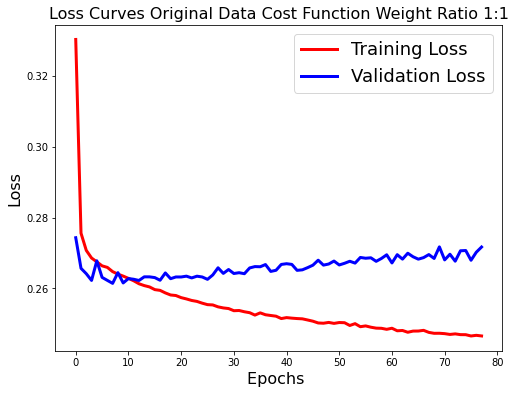

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves Original Data Cost Function Weight Ratio 1:1',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves Original Data Cost Function Weight Ratio 1:1')

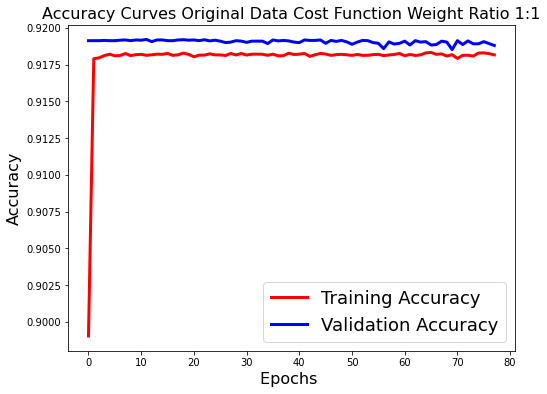

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves Original Data Cost Function Weight Ratio 1:1',fontsize=16)

### Original Data Cost Function Weight Ratio 1:10

In [ ]:
#create model
model1 = Sequential()

#add layers to model
model1.add(Dense(64, activation='relu', input_shape=(n_cols,)))
model1.add(BatchNormalization())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.4))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.4))
model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.4))
model1.add(Dense(2, activation='softmax'))

#compile model using accuracy to measure model performance
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                5184      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=200,batch_size=128, validation_split=0.25, class_weight = {0: 1., 1: 10.}, callbacks=[es])

Epoch 1/200
1429/1429 [==============================] - 9s 6ms/step - loss: 1.2599 - accuracy: 0.6038 - val_loss: 0.5949 - val_accuracy: 0.6604
Epoch 2/200
1429/1429 [==============================] - 9s 6ms/step - loss: 1.1359 - accuracy: 0.6676 - val_loss: 0.5888 - val_accuracy: 0.6890
Epoch 3/200
1429/1429 [==============================] - 8s 6ms/step - loss: 1.1215 - accuracy: 0.6722 - val_loss: 0.5638 - val_accuracy: 0.7570
Epoch 4/200
1429/1429 [==============================] - 8s 6ms/step - loss: 1.1125 - accuracy: 0.6775 - val_loss: 0.5668 - val_accuracy: 0.7359
Epoch 5/200
1429/1429 [==============================] - 8s 6ms/step - loss: 1.1070 - accuracy: 0.6768 - val_loss: 0.5850 - val_accuracy: 0.7135
Epoch 6/200
1429/1429 [==============================] - 9s 6ms/step - loss: 1.1030 - accuracy: 0.6781 - val_loss: 0.5822 - val_accuracy: 0.6426
Epoch 7/200
1429/1429 [==============================] - 8s 6ms/step - loss: 1.0980 - accuracy: 0.6784 - val_loss: 0.5707 - val_ac

Text(0.5, 1.0, 'Loss Curves Original Data Cost Function Weight Ratio 1:10')

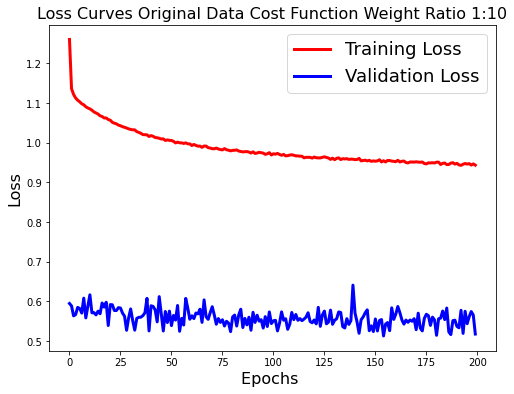

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves Original Data Cost Function Weight Ratio 1:10',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves Original Data Cost Function Weight Ratio 1:10')

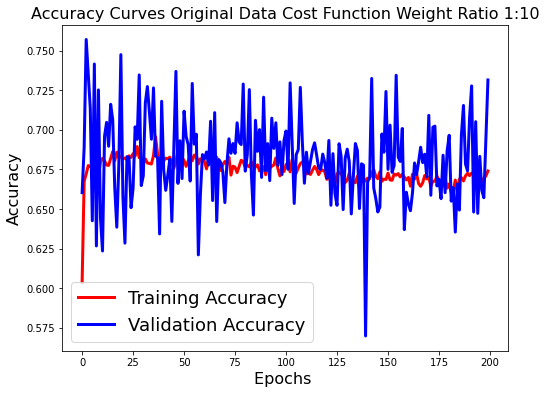

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['accuracy'],'r',linewidth=3.0)
plt.plot(history1.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves Original Data Cost Function Weight Ratio 1:10',fontsize=16)

### Run ANN using data with the majority class undersampled to the same size of minority class. Cost Function Weight Ratio 1:1

In [ ]:
y_train_usm=to_categorical(y_train_usm)

In [ ]:
#create model
model2 = Sequential()

#add layers to model
model2.add(Dense(64, activation='relu', input_shape=(n_cols,)))
model2.add(BatchNormalization())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(2, activation='softmax'))

#compile model using accuracy to measure model performance
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                5184      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

In [ ]:
history2 = model2.fit(X_train_usm, y_train_usm, epochs=200,batch_size=32, validation_split=0.25, callbacks=[es])

Epoch 1/200
931/931 [==============================] - 5s 6ms/step - loss: 0.7209 - accuracy: 0.6180 - val_loss: 0.8822 - val_accuracy: 0.1305
Epoch 2/200
931/931 [==============================] - 5s 6ms/step - loss: 0.6217 - accuracy: 0.6656 - val_loss: 0.9982 - val_accuracy: 0.2697
Epoch 3/200
931/931 [==============================] - 5s 6ms/step - loss: 0.6078 - accuracy: 0.6747 - val_loss: 1.0707 - val_accuracy: 0.2444
Epoch 4/200
931/931 [==============================] - 5s 6ms/step - loss: 0.6021 - accuracy: 0.6797 - val_loss: 0.9771 - val_accuracy: 0.2792
Epoch 5/200
931/931 [==============================] - 5s 6ms/step - loss: 0.5967 - accuracy: 0.6819 - val_loss: 1.0244 - val_accuracy: 0.2339
Epoch 6/200
931/931 [==============================] - 5s 6ms/step - loss: 0.5950 - accuracy: 0.6834 - val_loss: 0.9958 - val_accuracy: 0.3322
Epoch 7/200
931/931 [==============================] - 5s 6ms/step - loss: 0.5925 - accuracy: 0.6875 - val_loss: 1.0665 - val_accuracy: 0.2554

Text(0.5, 1.0, 'Loss Curves Extreme undersampling Data Cost Function Weight Ratio 1:1')

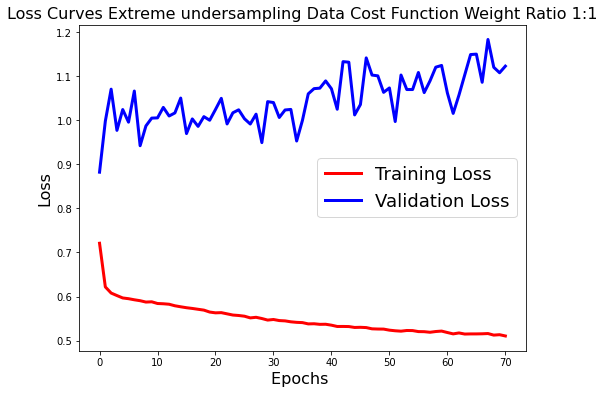

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves Extreme undersampling Data Cost Function Weight Ratio 1:1',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves Extreme undersampling Data Cost Function Weight Ratio 1:1')

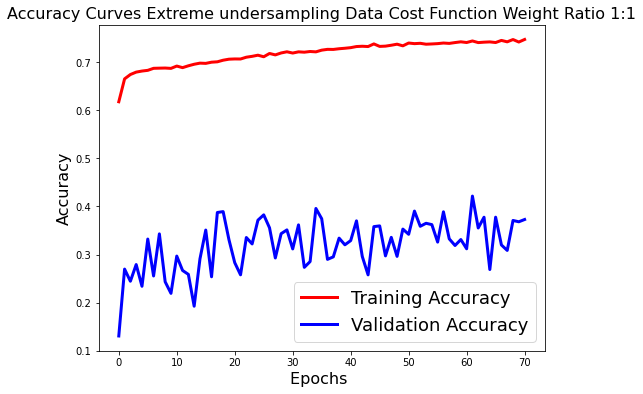

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=3.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves Extreme undersampling Data Cost Function Weight Ratio 1:1',fontsize=16)

### Original Data Cost Function Weight Ratio 1:12

In [ ]:
#create model
model3 = Sequential()
#add layers to model
model3.add(Dense(64, activation='relu', input_shape=(n_cols,)))
model3.add(BatchNormalization())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.4))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(256, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.4))
model3.add(Dense(256, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.4))
model3.add(Dense(2, activation='softmax'))

#compile model using accuracy to measure model performance
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                5184      
_________________________________________________________________
batch_normalization_12 (Batc (None, 64)                256       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_13 (Batc (None, 128)               512       
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)              

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=200,batch_size=128, validation_split=0.25, class_weight = {0: 1., 1: 12.}, callbacks=[es])

Epoch 1/200
1429/1429 [==============================] - 8s 6ms/step - loss: 1.4215 - accuracy: 0.5089 - val_loss: 0.6454 - val_accuracy: 0.6486
Epoch 2/200
1429/1429 [==============================] - 8s 6ms/step - loss: 1.2463 - accuracy: 0.5945 - val_loss: 0.6728 - val_accuracy: 0.5855
Epoch 3/200
1429/1429 [==============================] - 8s 6ms/step - loss: 1.2312 - accuracy: 0.6051 - val_loss: 0.6631 - val_accuracy: 0.5539
Epoch 4/200
1429/1429 [==============================] - 8s 6ms/step - loss: 1.2197 - accuracy: 0.6056 - val_loss: 0.6529 - val_accuracy: 0.5362
Epoch 5/200
1429/1429 [==============================] - 8s 6ms/step - loss: 1.2136 - accuracy: 0.6111 - val_loss: 0.6414 - val_accuracy: 0.6153
Epoch 6/200
1429/1429 [==============================] - 8s 6ms/step - loss: 1.2104 - accuracy: 0.6049 - val_loss: 0.6676 - val_accuracy: 0.6448
Epoch 7/200
1429/1429 [==============================] - 8s 6ms/step - loss: 1.2068 - accuracy: 0.6130 - val_loss: 0.6635 - val_ac

Text(0.5, 1.0, 'Loss Curves Original Data Cost Function Weight Ratio 1:12')

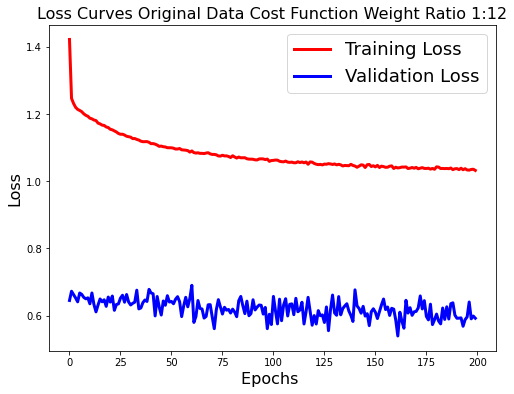

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['loss'],'r',linewidth=3.0)
plt.plot(history3.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves Original Data Cost Function Weight Ratio 1:12',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves Original Data Cost Function Weight Ratio 1:12')

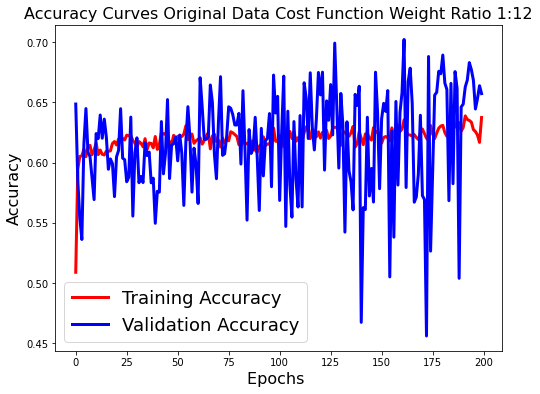

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['accuracy'],'r',linewidth=3.0)
plt.plot(history3.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves Original Data Cost Function Weight Ratio 1:12',fontsize=16)

### Original Data Cost Function Weight Ratio 1:8

In [ ]:
#create model
model4 = Sequential()
#add layers to model
model4.add(Dense(64, activation='relu', input_shape=(n_cols,)))
model4.add(BatchNormalization())
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(256, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))
model4.add(Dense(256, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))
model4.add(Dense(2, activation='softmax'))

#compile model using accuracy to measure model performance
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                5184      
_________________________________________________________________
batch_normalization_16 (Batc (None, 64)                256       
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_17 (Batc (None, 128)               512       
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)              

In [ ]:
history4 = model4.fit(X_train, y_train, epochs=200,batch_size=128, validation_split=0.25, class_weight = {0: 1., 1: 8.}, callbacks=[es])

Epoch 1/200
1429/1429 [==============================] - 8s 6ms/step - loss: 1.1233 - accuracy: 0.7168 - val_loss: 0.4790 - val_accuracy: 0.8335
Epoch 2/200
1429/1429 [==============================] - 8s 6ms/step - loss: 1.0105 - accuracy: 0.7632 - val_loss: 0.4859 - val_accuracy: 0.7540
Epoch 3/200
1429/1429 [==============================] - 8s 6ms/step - loss: 0.9979 - accuracy: 0.7610 - val_loss: 0.5588 - val_accuracy: 0.6054
Epoch 4/200
1429/1429 [==============================] - 8s 6ms/step - loss: 0.9898 - accuracy: 0.7620 - val_loss: 0.4999 - val_accuracy: 0.7507
Epoch 5/200
1429/1429 [==============================] - 8s 6ms/step - loss: 0.9855 - accuracy: 0.7563 - val_loss: 0.4914 - val_accuracy: 0.7923
Epoch 6/200
1429/1429 [==============================] - 8s 6ms/step - loss: 0.9820 - accuracy: 0.7566 - val_loss: 0.5412 - val_accuracy: 0.7477
Epoch 7/200
1429/1429 [==============================] - 8s 6ms/step - loss: 0.9778 - accuracy: 0.7584 - val_loss: 0.5197 - val_ac

Text(0.5, 1.0, 'Loss Curves Original Data Cost Function Weight Ratio 1:8')

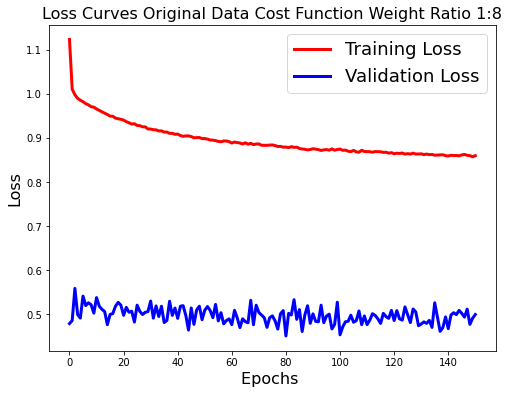

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history4.history['loss'],'r',linewidth=3.0)
plt.plot(history4.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves Original Data Cost Function Weight Ratio 1:8',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves Original Data Cost Function Weight Ratio 1:8')

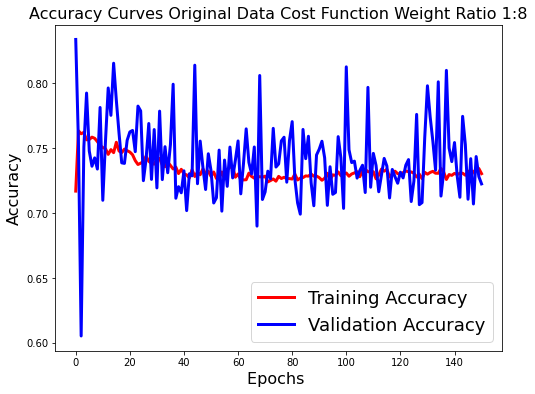

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history4.history['accuracy'],'r',linewidth=3.0)
plt.plot(history4.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves Original Data Cost Function Weight Ratio 1:8',fontsize=16)

### Print out AUC score, precision and recall for both test and train on each model

In [ ]:
y_train1=np.ndarray(shape=(y_train.shape[0]), dtype=float)
for i in range(y_train.shape[0]):
  if y_train[i,0] > y_train[i,1]:
      y_train1[i] = 0
  else:
     y_train1[i] = 1

In [ ]:
y_test1=np.ndarray(shape=(y_test.shape[0]), dtype=float)
for i in range(y_test.shape[0]):
  if y_test[i,0] > y_test[i,1]:
      y_test1[i] = 0
  else:
     y_test1[i] = 1

In [ ]:
y_train_proba_m = model.predict(X_train)
y_test_proba_m = model.predict(X_test)
y_train_pred_m=np.ndarray(shape=(y_train_proba_m.shape[0]), dtype=float)
y_test_pred_m=np.ndarray(shape=(y_test_proba_m.shape[0]), dtype=float)

for i in range(y_train_proba_m.shape[0]):
  if y_train_proba_m[i,0] > y_train_proba_m[i,1]:
      y_train_pred_m[i] = 0
  else:
      y_train_pred_m[i] = 1

for j in range(y_test_proba_m.shape[0]):
  if y_test_proba_m[j,0] > y_test_proba_m[j,1]:
      y_test_pred_m[j] = 0
  else:
      y_test_pred_m[j] = 1

In [ ]:
print('Original Data Cost Function Weight 1:1')
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train1, y_train_pred_m))
print("Accuracy Train:", skm.accuracy_score(y_train1, y_train_pred_m))
print("Precision Train:", skm.precision_score(y_train1, y_train_pred_m))
print("Recall Train:", skm.recall_score(y_train1, y_train_pred_m))
print(" Train AUC score", skm.roc_auc_score(y_train1, y_train_proba_m[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_test1, y_test_pred_m))
print("Accuracy Test:", skm.accuracy_score(y_test1, y_test_pred_m))
print("Precision Test:", skm.precision_score(y_test1, y_test_pred_m))
print("Recall Test:", skm.recall_score(y_test1, y_test_pred_m))
print(" Test AUC score", skm.roc_auc_score(y_test1, y_test_proba_m[:,1]))

Original Data Cost Function Weight 1:1
Train Confusion Matrix: 
 [[223812     84]
 [ 19753    107]]
Accuracy Train: 0.9186194391112424
Precision Train: 0.5602094240837696
Recall Train: 0.005387713997985901
 Train AUC score 0.7647083448433168

 Test Confusion Matrix: 
 [[55952    24]
 [ 4947    18]]
Accuracy Test: 0.9184293004709473
Precision Test: 0.42857142857142855
Recall Test: 0.0036253776435045317
 Test AUC score 0.6843035484492634


In [ ]:
y_train_proba_m1 = model1.predict(X_train)
y_test_proba_m1 = model1.predict(X_test)
y_train_pred_m1=np.ndarray(shape=(y_train_proba_m1.shape[0]), dtype=float)
y_test_pred_m1=np.ndarray(shape=(y_test_proba_m1.shape[0]), dtype=float)

for i in range(y_train_proba_m1.shape[0]):
  if y_train_proba_m1[i,0] > y_train_proba_m1[i,1]:
      y_train_pred_m1[i] = 0
  else:
      y_train_pred_m1[i] = 1

for j in range(y_test_proba_m1.shape[0]):
  if y_test_proba_m1[j,0] > y_test_proba_m1[j,1]:
      y_test_pred_m1[j] = 0
  else:
      y_test_pred_m1[j] = 1

In [ ]:
print('Original Data Cost Function Weight 1:10')
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train1, y_train_pred_m1))
print("Accuracy Train:", skm.accuracy_score(y_train1, y_train_pred_m1))
print("Precision Train:", skm.precision_score(y_train1, y_train_pred_m1))
print("Recall Train:", skm.recall_score(y_train1, y_train_pred_m1))
print(" Train AUC score", skm.roc_auc_score(y_train1, y_train_proba_m1[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_test1, y_test_pred_m1))
print("Accuracy Test:", skm.accuracy_score(y_test1, y_test_pred_m1))
print("Precision Test:", skm.precision_score(y_test1, y_test_pred_m1))
print("Recall Test:", skm.recall_score(y_test1, y_test_pred_m1))
print(" Test AUC score", skm.roc_auc_score(y_test1, y_test_proba_m1[:,1]))

Original Data Cost Function Weight 1:10
Train Confusion Matrix: 
 [[170820  53076]
 [  6912  12948]]
Accuracy Train: 0.7539014424260326
Precision Train: 0.19611050527081061
Recall Train: 0.6519637462235649
 Train AUC score 0.7845205934205678

 Test Confusion Matrix: 
 [[42055 13921]
 [ 2449  2516]]
Accuracy Test: 0.731379531021808
Precision Test: 0.15306929488349455
Recall Test: 0.5067472306143
 Test AUC score 0.6792872117830387


In [ ]:
y_train_proba_m2 = model2.predict(X_train)
y_test_proba_m2 = model2.predict(X_test)
y_train_pred_m2=np.ndarray(shape=(y_train_proba_m2.shape[0]), dtype=float)
y_test_pred_m2=np.ndarray(shape=(y_test_proba_m2.shape[0]), dtype=float)

for i in range(y_train_proba_m2.shape[0]):
  if y_train_proba_m2[i,0] > y_train_proba_m2[i,1]:
      y_train_pred_m2[i] = 0
  else:
      y_train_pred_m2[i] = 1

for j in range(y_test_proba_m2.shape[0]):
  if y_test_proba_m2[j,0] > y_test_proba_m2[j,1]:
      y_test_pred_m2[j] = 0
  else:
      y_test_pred_m2[j] = 1

In [ ]:
print('Extreme undersampling Data Cost Function Weight Ratio 1:1')
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train1, y_train_pred_m2))
print("Accuracy Train:", skm.accuracy_score(y_train1, y_train_pred_m2))
print("Precision Train:", skm.precision_score(y_train1, y_train_pred_m2))
print("Recall Train:", skm.recall_score(y_train1, y_train_pred_m2))
print(" Train AUC score", skm.roc_auc_score(y_train1, y_train_proba_m2[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_test1, y_test_pred_m2))
print("Accuracy Test:", skm.accuracy_score(y_test1, y_test_pred_m2))
print("Precision Test:", skm.precision_score(y_test1, y_test_pred_m2))
print("Recall Test:", skm.recall_score(y_test1, y_test_pred_m2))
print(" Test AUC score", skm.roc_auc_score(y_test1, y_test_proba_m2[:,1]))

Extreme undersampling Data Cost Function Weight Ratio 1:1
Train Confusion Matrix: 
 [[185017  38879]
 [ 10591   9269]]
Accuracy Train: 0.7970511495101659
Precision Train: 0.19251059234028411
Recall Train: 0.46671701913393754
 Train AUC score 0.7247382417669389

 Test Confusion Matrix: 
 [[45918 10058]
 [ 3145  1820]]
Accuracy Test: 0.7833478282273019
Precision Test: 0.15322444856036369
Recall Test: 0.36656596173212486
 Test AUC score 0.6556252456634775


In [ ]:
y_train_proba_m3 = model3.predict(X_train)
y_test_proba_m3 = model3.predict(X_test)
y_train_pred_m3=np.ndarray(shape=(y_train_proba_m3.shape[0]), dtype=float)
y_test_pred_m3=np.ndarray(shape=(y_test_proba_m3.shape[0]), dtype=float)

for i in range(y_train_proba_m3.shape[0]):
  if y_train_proba_m3[i,0] > y_train_proba_m3[i,1]:
      y_train_pred_m3[i] = 0
  else:
      y_train_pred_m3[i] = 1

for j in range(y_test_proba_m3.shape[0]):
  if y_test_proba_m3[j,0] > y_test_proba_m3[j,1]:
      y_test_pred_m3[j] = 0
  else:
      y_test_pred_m3[j] = 1

In [ ]:
print('Original Data Cost Function Weight 1:12')
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train1, y_train_pred_m3))
print("Accuracy Train:", skm.accuracy_score(y_train1, y_train_pred_m3))
print("Precision Train:", skm.precision_score(y_train1, y_train_pred_m3))
print("Recall Train:", skm.recall_score(y_train1, y_train_pred_m3))
print(" Train AUC score", skm.roc_auc_score(y_train1, y_train_proba_m3[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_test1, y_test_pred_m3))
print("Accuracy Test:", skm.accuracy_score(y_test1, y_test_pred_m3))
print("Precision Test:", skm.precision_score(y_test1, y_test_pred_m3))
print("Recall Test:", skm.recall_score(y_test1, y_test_pred_m3))
print(" Test AUC score", skm.roc_auc_score(y_test1, y_test_proba_m3[:,1]))

Original Data Cost Function Weight 1:12
Train Confusion Matrix: 
 [[151504  72392]
 [  4812  15048]]
Accuracy Train: 0.683273437371798
Precision Train: 0.17209515096065875
Recall Train: 0.7577039274924471
 Train AUC score 0.7805610413513453

 Test Confusion Matrix: 
 [[37148 18828]
 [ 2019  2946]]
Accuracy Test: 0.6579150325724882
Precision Test: 0.13529898043538166
Recall Test: 0.5933534743202417
 Test AUC score 0.6760358956888588


In [ ]:
y_train_proba_m4 = model4.predict(X_train)
y_test_proba_m4 = model4.predict(X_test)
y_train_pred_m4=np.ndarray(shape=(y_train_proba_m4.shape[0]), dtype=float)
y_test_pred_m4=np.ndarray(shape=(y_test_proba_m4.shape[0]), dtype=float)

for i in range(y_train_proba_m4.shape[0]):
  if y_train_proba_m4[i,0] > y_train_proba_m4[i,1]:
      y_train_pred_m4[i] = 0
  else:
      y_train_pred_m4[i] = 1

for j in range(y_test_proba_m4.shape[0]):
  if y_test_proba_m4[j,0] > y_test_proba_m4[j,1]:
      y_test_pred_m4[j] = 0
  else:
      y_test_pred_m4[j] = 1

In [ ]:
print('Original Data Cost Function Weight 1:8')
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train1, y_train_pred_m4))
print("Accuracy Train:", skm.accuracy_score(y_train1, y_train_pred_m4))
print("Precision Train:", skm.precision_score(y_train1, y_train_pred_m4))
print("Recall Train:", skm.recall_score(y_train1, y_train_pred_m4))
print(" Train AUC score", skm.roc_auc_score(y_train1, y_train_proba_m4[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_test1, y_test_pred_m4))
print("Accuracy Test:", skm.accuracy_score(y_test1, y_test_pred_m4))
print("Precision Test:", skm.precision_score(y_test1, y_test_pred_m4))
print("Recall Test:", skm.recall_score(y_test1, y_test_pred_m4))
print(" Test AUC score", skm.roc_auc_score(y_test1, y_test_proba_m4[:,1]))

Original Data Cost Function Weight 1:8
Train Confusion Matrix: 
 [[168531  55365]
 [  6631  13229]]
Accuracy Train: 0.7456636964833686
Precision Train: 0.19285943376971748
Recall Train: 0.6661127895266868
 Train AUC score 0.7787195244961775

 Test Confusion Matrix: 
 [[41507 14469]
 [ 2417  2548]]
Accuracy Test: 0.7229123250356903
Precision Test: 0.1497326203208556
Recall Test: 0.5131923464249748
 Test AUC score 0.6756610425472231


In [118]:
Comparison_dict = {'Original Data Cost Function Weight 1:1':[0.918,0.429,0.0036,0.684],
                       'Undersampling Data Cost Function Weight Ratio 1:1':[0.783,0.153,0.367,0.656],
                       'Original Data Cost Function Weight 1:8':[0.723,0.150,0.513,0.676],
                       'Original Data Cost Function Weight 1:10':[0.731,0.153,0.507,0.679],
                       'Original Data Cost Function Weight 1:12':[0.658,0.135,0.593,0.676]}

model_comparison = pd.DataFrame(Comparison_dict)
model_comparison['Metrics'] = ['Test_Accuracy','Test_Precision','Test_Recall','Test_AUC']
#re-arranging the column order
cols = model_comparison.columns.tolist()
cols = cols[-1:] + cols[:-1]
model_comparison = model_comparison[cols]

#pivot
model_comparison = model_comparison.transpose()
model_comparison = model_comparison[1:].reset_index(drop=False)
model_comparison.columns = ['Model','Test_Accuracy','Test_Precision','Test_Recall','Test_AUC']
model_comparison

,Model,Test_Accuracy,Test_Precision,Test_Recall,Test_AUC
0,Original Data Cost Function Weight 1:1,0.918,0.429,0.0036,0.684
1,Undersampling Data Cost Function Weight Ratio 1:1,0.783,0.153,0.367,0.656
2,Original Data Cost Function Weight 1:8,0.723,0.15,0.513,0.676
3,Original Data Cost Function Weight 1:10,0.731,0.153,0.507,0.679
4,Original Data Cost Function Weight 1:12,0.658,0.135,0.593,0.676


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [ ]:
def create_model(learn_rate=0.01):
  modelf = Sequential()
  modelf.add(Dense(64, activation='relu', input_shape=(80,)))
  modelf.add(BatchNormalization())
  modelf.add(Dense(64, activation='relu'))
  modelf.add(Dropout(0.4))
  modelf.add(Dense(128, activation='relu'))
  modelf.add(BatchNormalization())
  modelf.add(Dropout(0.4))
  modelf.add(Dense(128, activation='relu'))
  modelf.add(Dropout(0.4))
  modelf.add(Dense(256, activation='relu'))
  modelf.add(BatchNormalization())
  modelf.add(Dropout(0.4))
  modelf.add(Dense(256, activation='relu'))
  modelf.add(BatchNormalization())
  modelf.add(Dropout(0.4))
  modelf.add(Dense(2, activation='softmax'))
  optimizer = Adam(lr=learn_rate)
  modelf.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return modelf

In [ ]:
model_rs = KerasClassifier(build_fn=create_model, epochs=100, batch_size=128, validation_split=0.25)

In [ ]:
param_grid = {'learn_rate': [0.01, 0.05, 0.1, 0.2],
'class_weight': [{0:1, 1:8}, {0:1, 1:10}, {0:1, 1:12}]
}

In [ ]:
grid1_random = RandomizedSearchCV(estimator= model_rs, param_distributions= param_grid,cv=3, verbose = 0, scoring= 'roc_auc')
grid_result1_random = grid1_random.fit(X_train, y_train)

In [ ]:
best_model= grid_result1_random.best_estimator_

In [ ]:
y_train_pred_bm = best_model.predict(X_train)
y_test_pred_bm = best_model.predict(X_test)

y_train_proba_bm = best_model.predict_proba(X_train)
y_test_proba_bm = best_model.predict_proba(X_test)